# Hypothesis Testing

Borrowing the case from previous codelab, about CTP and coin toss, we could rephrase our method to answer into a common statistical problem of Hypothesis Testing. 

Hypothesis testing, according to wolfram $^{[1]}$ is:
> the use of statistics to determine the probability that a given hypothesis is true

Todo this usually we:
1. Determine Null Hypothesis ($H_{0}$) and Alternative Hypothesis ($H_{1})$.
2. Identify test statistics to assess Null hypothesis's truth.
3. Compute $p$-value, which is the probability that a test statistics at least significant
4. Compare $p$-value to an $\alpha$. If $p \leq \alpha$ then null hypothesis will be accepted, else if $\alpha < p$ then null hypothesis will be rejected and alternative hypothesis will be accepted.


Right.
<div>
    <img src="https://media.giphy.com/media/3o7TKyhhUW9gVsHiF2/giphy.gif" alt="001.gif" width="300" height="300" />
    <img src="https://media.giphy.com/media/Bp3dFfoqpCKFyXuSzP/giphy.gif" alt="002.gif" width="300" height="300" />
</div>


Let me *hopefully* help to explain this slower. 

$H_0$ is usually set from our *a priori* knowledge, or **from our past knowledge**. So in the coin problem our $H_0$:
> The coin is a fair coin

We do know / assume that all coins are fair, because it always consists of 1 Head and 1 Tail. 



$H_1$, on the other hand, the observations show a real effect combined with a component of chance variation. In the coin problem our $H_1$:
> The coin is not a fair coin




$H_0 = $ The coin is a fair coin

$H_1 = $ The coin is not a fair coin, more favor to head

We can re-write a more clearer definition of fair coin, from our observation. We know that a fair coin, with 30 times tosses should results in about 15 heads, which favor to less than 22 heads $P[X\leq22]$. On the other hand, a non fair coin should favor head, which translates to more than or equal to 22 heads $P[X>22]$. 

We then set our confidence level to 95% (just because there are many people using this confidence level, you can set it to 99% though), which means if the $p$-value get lower than $0.05$, then **reject the null hypothesis** and we accept our alternative hypothesis that the coin is not fair.

**note**: you might also find [a youtube video from Cassie Kozyrkov](https://www.youtube.com/watch?v=9jW9G8MO4PQ) useful to explain the $p$-value, null hypothesis, and alternative hypothesis using puppies $^{[2]}$

In [82]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
n_tosses = 30
n_head = 22
prior = 0.5

chance_getting_head = st.binom.pmf(n_head, n_tosses, prior) 

print('Chance to get exactly {} head, out of {} tosses is {:.2%}'.format(n_head, n_tosses, chance_getting_head))

Chance to get exactly 22 head, out of 30 tosses is 0.55%


Now we have set our **Confidence level** to 95%. What does it mean? 
1. We allow 5% Type I error $^{[3]}$. Type I error is **False Positive**, we **falsely reject null hypothesis** although it is **actually true**
2. We have set **Significant Level** $\alpha = 0.05$ or 5%


### Significant Level vs Confidence Level
The relationship between confidence level and significant level is
$$\text{Confidence Level} = 1 - \text{Significant Level}$$

continuing to our discussion about coin we want to calculate the $p$-value of 

In [84]:
alpha = 0.05
p_val = 1 - st.binom.cdf(n_head, n_tosses, p=prior)
msg  = 'p-value {:.3f} is '.format(p_val)

if p_val < alpha:
    msg += 'less than alpha {:.2f}, thus we reject the null hypothesis'.format(alpha)
else:
    msg += 'more than equal alpha {:.2f}, thus we accept the null hypothesis'.format(alpha)
    
print(msg)

p-value 0.003 is less than alpha 0.05, thus we reject the null hypothesis


This means we have reject null hypothesis and accept the alternative hypothesis.

According to this numbers, because the probability of getting 22 is super small, while we allow 5% False Positive, we have refused to believe that this coin is fair!

Let us dig into more clearer picture

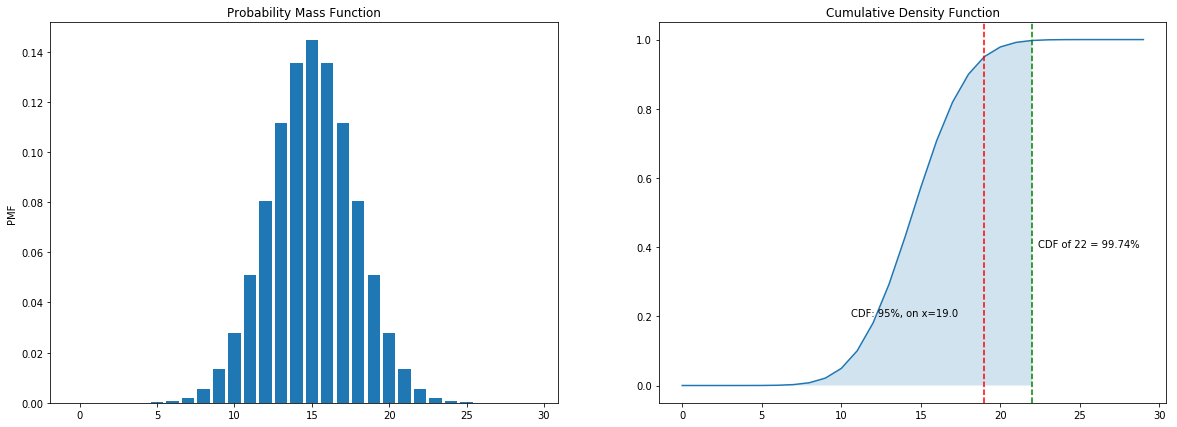

In [85]:
x = np.arange(30)

f, ax = plt.subplots(figsize=(20, 7))
plt.subplot(121)
plt.bar(x, st.binom.pmf(x, n_tosses, prior))
plt.ylabel('PMF')
plt.title('Probability Mass Function')

plt.subplot(122)
plt.title('Cumulative Density Function')
plt.plot(x, st.binom.cdf(x, n_tosses, prior))
x1 = np.arange(23)

plt.fill_between(x1, st.binom.cdf(x1, n_tosses, prior), alpha=0.2)
plt.axvline(22, linestyle='--', color='green')
plt.annotate('CDF of {} = {:.2%}'.format(22, st.binom.cdf(22, n_tosses, prior)), (22.4, 0.4),)

plt.axvline(st.binom.ppf(0.95, n_tosses, prior), color='red', linestyle='--')
plt.annotate(
    'CDF: 95%, on x={}'.format(st.binom.ppf(0.95, n_tosses, prior)), 
    (st.binom.ppf(0.95, n_tosses, prior) - 8.4, 0.2)
)


plt.show()

This graph shows the probability of getting number of heads. Looking at CDF graph (right picture), we know that everything goes beyond **19 heads** will be called **unfair**. And yet we have 22, thus we also called that coin **unfair**.


![unfair](https://media.giphy.com/media/26FKTvvfHpPaalpni/giphy.gif)

# Hypothesis Testing from Other Perspective

## The New Case

Hypothesis testing method is useful and you might heard it has been used to calculate AB Testing result. I will take you to the previous Probability2 codelab sample case about CTP of an OTA web.

Let say that you have a hypothesis that changing the layout of home page would have an effect on the conversion rate / CTP from home to search result page.

In [86]:
import numpy as np

In [87]:
control_ctps = [0.2, 0.3, 0.14, 0.29, 0.27, 0.24, 0.19]
variantb_ctps = [0.25, 0.28, 0.2, 0.29, 0.18, 0.24, 0.26]

In [88]:
mean_control = np.mean(control_ctps)
mean_variantb = np.mean(variantb_ctps)

print('control avg ctp: {:.3f}'.format(mean_control))
print('variant b avg ctp: {:.3f}'.format(mean_variantb))
print(
    'difference between control and variantb: {:.4f}'.format(
        abs(mean_control - mean_variantb)
    )
)


control avg ctp: 0.233
variant b avg ctp: 0.243
difference between control and variantb: 0.0100


Difference between ctps is super small: ~ 1%, with variant b produces higher result. Now we want to know if variant b produces this result by chance? if we extend our experiment period, will it produces same result between control and variant?

This is the question that we want to answer with hypothesis testing. However, previously we have used statistical method called t-test and yet we might lost track about what questions that we want to answer? Let's try hacker style.

## Hypothesis Testing Hacker Style - Shuffling the Data

### The Idea

if the two group means does not differ that much, then it would not be a problem if we switch up some of the elements from one group with the other, then recompute the mean.

### Some Notes on Shuffling
Shuffling works when:
1. The Null Hypothesis assumes two groups are equivalent
2. If the samples are representative (be careful about selection bias)

### The Hypothesis

$H_0$: The mean are same, the variant did not make improvements

$H_1$: The mean are different, the variant did the job

In [89]:
def swap(list_a, list_b, i_a, i_b):
    
    # swap value
    temp = list_a[i_a]
    list_a[i_a] = list_b[i_b]
    list_b[i_b] = temp
    
    return list_a, list_b
    
def shuffle(list_a, list_b, n_values=1):
    """
    shuffle list_a and list_b values: 
        > take 1 value from a randomly and switch with random list_b value.
    """
    len_a = len(list_a)
    len_b = len(list_b)
    
    for i in range(n_values):
        i_a = np.random.randint(len_a)
        i_b = np.random.randint(len_b)
        list_a, list_b = swap(list_a, list_b, i_a, i_b)
        
    return list_a, list_b


In [90]:
assert np.all(
    np.equal(
        swap([0.1,0.2], [0.3,0.4], 0, 0), 
        ([0.3, 0.2], [0.1, 0.4])
    )
)

np.random.seed(1)
assert np.all(
    np.equal(
        shuffle([0.1,0.2, 0.3, 0.4], [0.55,0.66]),
        ([0.1, 0.66, 0.3, 0.4], [0.55, 0.2])
    )
)

Now we should repeatedly shuffle then recalculate the mean from each group. Also repeatedly calculate those mean difference then plot it into histogram.

In [93]:
def repeat_take_avg(list_a, list_b, n_iter=1000):
    diffs = np.zeros(n_iter)
    for i in range(n_iter):
        list_a, list_b = shuffle(
            list_a, list_b, min(len(list_a), len(list_b)) // 2
        )
        
        diffs[i] = np.mean(list_a) - np.mean(list_b)
        
    return diffs

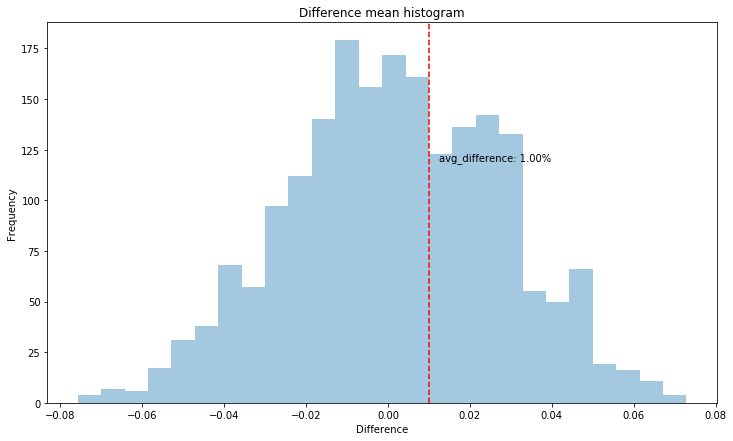

In [114]:
f, ax = plt.subplots(figsize=(12, 7))

n_iter = 2000
avg_difference = 0.01
diffs = repeat_take_avg(control_ctps, variantb_ctps, n_iter)
sns.distplot(
    diffs,
    kde=False,
    ax=ax
)
plt.axvline(avg_difference, color='red', linestyle='--')
plt.annotate(
    'avg_difference: {:.2%}'.format(avg_difference),
    (avg_difference + 0.0025, 120)
)

plt.title('Difference mean histogram')
plt.ylabel('Frequency')
plt.xlabel('Difference')
plt.show()

In [122]:
n_lt_avg = diffs[diffs > avg_difference].shape[0]
pct = n_lt_avg / n_iter
print('{:.2f}'.format(pct))

0.38


We are looking at somewhere below 0.05 (on 95% confidence level) to reject the null hypothesis. That is when the chance that two means comes from same distribution is very low. 

In [123]:
if pct < 0.05:
    print('difference {:.2%} is significant under 95% confidence level'.format(avg_difference))
else:
    print('difference {:.2%} is not significant under 95% confidence level'.format(avg_difference))

difference 1.00% is not significant under 95% confidence level


It turns out the variant might not be effecting the conversion rate that much!

# References
[1] http://mathworld.wolfram.com/HypothesisTesting.html

[2] https://www.youtube.com/watch?v=9jW9G8MO4PQ

[3] https://en.wikipedia.org/wiki/Type_I_and_type_II_errors